In [1]:
import nltk
import numpy as np
import tensorflow as tf

# NLP Tasks

Text classification: Sentiment analysis, Spam filters, Author classification...

Information retrieval, Question answering, Reading comprehension

Summarization

Translation

In [2]:
# Как да представим текст като вектор от числа?

In [3]:
# Еми оказва се че тъпия подход е сравнително ефективен:
# Bag of words

example_text = [
    "Втората световна война е глобална война, продължила между 1939 и 1945 година.",
    "Голямото мнозинство от страните в света, включително всички Велики сили, в един или друг момент се включват във войната, присъединявайки се към един от двата противопоставящи се военни съюза – Съюзниците и Оста.",
    "Достига се до състояние на тотална война, в която пряко участват над 100 милиона души от повече от 30 страни.",
    "Основните участници хвърлят целия си стопански, промишлен и научен потенциал във военното усилие, размивайки границите между граждански и военни ресурси."
]
example_text

['Втората световна война е глобална война, продължила между 1939 и 1945 година.',
 'Голямото мнозинство от страните в света, включително всички Велики сили, в един или друг момент се включват във войната, присъединявайки се към един от двата противопоставящи се военни съюза – Съюзниците и Оста.',
 'Достига се до състояние на тотална война, в която пряко участват над 100 милиона души от повече от 30 страни.',
 'Основните участници хвърлят целия си стопански, промишлен и научен потенциал във военното усилие, размивайки границите между граждански и военни ресурси.']

In [4]:
example_text = [x.lower() for x in example_text]
example_text

['втората световна война е глобална война, продължила между 1939 и 1945 година.',
 'голямото мнозинство от страните в света, включително всички велики сили, в един или друг момент се включват във войната, присъединявайки се към един от двата противопоставящи се военни съюза – съюзниците и оста.',
 'достига се до състояние на тотална война, в която пряко участват над 100 милиона души от повече от 30 страни.',
 'основните участници хвърлят целия си стопански, промишлен и научен потенциал във военното усилие, размивайки границите между граждански и военни ресурси.']

In [5]:
example_text = [nltk.word_tokenize(x) for x in example_text]
example_text

[['втората',
  'световна',
  'война',
  'е',
  'глобална',
  'война',
  ',',
  'продължила',
  'между',
  '1939',
  'и',
  '1945',
  'година',
  '.'],
 ['голямото',
  'мнозинство',
  'от',
  'страните',
  'в',
  'света',
  ',',
  'включително',
  'всички',
  'велики',
  'сили',
  ',',
  'в',
  'един',
  'или',
  'друг',
  'момент',
  'се',
  'включват',
  'във',
  'войната',
  ',',
  'присъединявайки',
  'се',
  'към',
  'един',
  'от',
  'двата',
  'противопоставящи',
  'се',
  'военни',
  'съюза',
  '–',
  'съюзниците',
  'и',
  'оста',
  '.'],
 ['достига',
  'се',
  'до',
  'състояние',
  'на',
  'тотална',
  'война',
  ',',
  'в',
  'която',
  'пряко',
  'участват',
  'над',
  '100',
  'милиона',
  'души',
  'от',
  'повече',
  'от',
  '30',
  'страни',
  '.'],
 ['основните',
  'участници',
  'хвърлят',
  'целия',
  'си',
  'стопански',
  ',',
  'промишлен',
  'и',
  'научен',
  'потенциал',
  'във',
  'военното',
  'усилие',
  ',',
  'размивайки',
  'границите',
  'между',
  'граж

In [6]:
# Ако ни се занимава можем да махнем препинателни знаци и стоп думи, но няма да го правим

def vectorize(data):
    all_words = set()
    for x in data:
        for y in x:
            all_words.add(y)
    word_to_num = {w:i for i, w in enumerate(all_words)}
    ans = np.zeros((len(data), len(all_words)))
    for i, x in enumerate(data):
        for y in x:
            ans[i, word_to_num[y]] += 1
    return ans

vectorize(example_text)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 2., 0., 0., 0., 1., 1., 3., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 3., 1., 1., 0., 0., 2., 1., 1., 0., 0., 1., 0., 0.,
        1., 2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1.],
       [0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 2., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0

In [7]:
# Недостатъци:
# Дебело представяне (като нищо векторите ще станат с размер 50к)
# Губи се реда на думите (което всъщност се оказва че не е чак толкова важно)

In [8]:
# Едно често използвано подобрение - TFIDF
# По-редките думи са по-значими

def tfidf(data):
    all_words = set()
    for x in data:
        for y in x:
            all_words.add(y)
    word_to_num = {w:i for i, w in enumerate(all_words)}
    
    ans = np.zeros((len(data), len(all_words)))
    df = np.zeros(len(all_words))
    for i, x in enumerate(data):
        for y in x:
            num = word_to_num[y]
            ans[i, num] += 1
            if ans[i, num]==1:
                df[num] += 1
    ans = ans * np.log(len(data) / df)
    return ans

tfidf(example_text)

array([[0.        , 1.38629436, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.38629436, 1.38629436, 0.        , 0.69314718,
        0.        , 0.        , 0.28768207, 0.        , 0.        ,
        0.        , 1.38629436, 0.        , 1.38629436, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.38629436, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.38629436, 0.        , 0.        , 1.38629436, 0.        ,
        0.        , 0.        , 0.        , 1.38629436, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.3

In [9]:
# Естествено, по-полезно е с повече документи

In [10]:
import pandas as pd
pd.options.display.max_rows = 10

train = pd.read_csv('./train.csv', index_col='id')
train

,text,author
id,,
id26305,"This process, however, afforded me no means of...",EAP
id17569,It never once occurred to me that the fumbling...,HPL
id11008,"In his left hand was a gold snuff box, from wh...",EAP
id27763,How lovely is spring As we looked from Windsor...,MWS
id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...
id17718,"I could have fancied, while I looked at it, th...",EAP
id08973,The lids clenched themselves together as if in...,EAP
id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_all = vectorizer.fit_transform(train.text)
x_all

<19579x25068 sparse matrix of type '<class 'numpy.float64'>'
	with 429602 stored elements in Compressed Sparse Row format>

In [12]:
x_all = x_all/np.sqrt(np.sum(x_all.toarray()**2, axis=-1)).reshape(-1, 1)
x_all

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_all, train.author, test_size=0.2, random_state=42)

In [14]:
x_train.shape, x_val.shape

((15663, 25068), (3916, 25068))

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\users\iddilov\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn import metrics

y_pred = lr.predict_proba(x_train)
print(f"train log_loss = {metrics.log_loss(y_train, y_pred)}")
y_pred = lr.predict_proba(x_val)
print(f"log_loss = {metrics.log_loss(y_val, y_pred)}")
y_pred = lr.predict(x_val)
print(f"accuracy = {metrics.accuracy_score(y_val, y_pred)}")

train log_loss = 0.3982996394590997
log_loss = 0.5410314214059891
accuracy = 0.8120531154239019


In [17]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
from sklearn import metrics

y_pred = nb.predict_proba(x_train)
print(f"train log_loss = {metrics.log_loss(y_train, y_pred)}")
y_pred = nb.predict_proba(x_val)
print(f"log_loss = {metrics.log_loss(y_val, y_pred)}")
y_pred = nb.predict(x_val)
print(f"accuracy = {metrics.accuracy_score(y_val, y_pred)}")

train log_loss = 0.4809467539837631
log_loss = 0.6104175660117682
accuracy = 0.8117977528089888


In [19]:
to_num = {'EAP':0, 'MWS':1, 'HPL':2}

y_train = np.asarray([np.eye(3)[to_num[y]] for y in y_train])
y_val = np.asarray([np.eye(3)[to_num[y]] for y in y_val])
y_train[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(x_train.shape[-1],), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                802208    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 803,363
Trainable params: 803,363
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics = ['categorical_crossentropy', 'accuracy'])

model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_val, y_val))

Train on 15663 samples, validate on 3916 samples
Epoch 1/10
15663/15663 [==============================] - 3s 164us/sample - loss: 1.0804 - categorical_crossentropy: 1.0804 - accuracy: 0.4053 - val_loss: 1.0422 - val_categorical_crossentropy: 1.0422 - val_accuracy: 0.4053
Epoch 2/10
15663/15663 [==============================] - 2s 111us/sample - loss: 0.9812 - categorical_crossentropy: 0.9812 - accuracy: 0.5517 - val_loss: 0.8881 - val_categorical_crossentropy: 0.8881 - val_accuracy: 0.7104
Epoch 3/10
15663/15663 [==============================] - 2s 99us/sample - loss: 0.7828 - categorical_crossentropy: 0.7828 - accuracy: 0.7523 - val_loss: 0.6714 - val_categorical_crossentropy: 0.6714 - val_accuracy: 0.8184
Epoch 4/10
15663/15663 [==============================] - 2s 99us/sample - loss: 0.5651 - categorical_crossentropy: 0.5651 - accuracy: 0.8399 - val_loss: 0.5156 - val_categorical_crossentropy: 0.5156 - val_accuracy: 0.8335
Epoch 5/10
15663/15663 [==============================] -

In [22]:
# Както виждаме получаваме по-добър резултат с малко по-дълбока архитектура

In [23]:
# Няколко думи за различен preprocessing
# Stemming
# Lemmatization
# NE tagging
# POS tagging

# Word embeddings

In [24]:
word_data = [nltk.word_tokenize(x) for x in train.text]
word_data[:2]

[['This',
  'process',
  ',',
  'however',
  ',',
  'afforded',
  'me',
  'no',
  'means',
  'of',
  'ascertaining',
  'the',
  'dimensions',
  'of',
  'my',
  'dungeon',
  ';',
  'as',
  'I',
  'might',
  'make',
  'its',
  'circuit',
  ',',
  'and',
  'return',
  'to',
  'the',
  'point',
  'whence',
  'I',
  'set',
  'out',
  ',',
  'without',
  'being',
  'aware',
  'of',
  'the',
  'fact',
  ';',
  'so',
  'perfectly',
  'uniform',
  'seemed',
  'the',
  'wall',
  '.'],
 ['It',
  'never',
  'once',
  'occurred',
  'to',
  'me',
  'that',
  'the',
  'fumbling',
  'might',
  'be',
  'a',
  'mere',
  'mistake',
  '.']]

In [25]:
def get_num_data(data):
    num2word = set()
    for x in data:
        for y in x:
            num2word.add(y)
    num2word = list(num2word)
    word2num = {w:i for i,w in enumerate(num2word)}
    new_data = []
    for x in data:
        new_data.append([])
        for y in x:
            new_data[-1].append(word2num[y])
    return new_data, num2word, word2num

num_data, num2word, word2num = get_num_data(word_data)
print(num_data[0][:5])
print([num2word[x] for x in num_data[0][:5]])

[24218, 20295, 13975, 6312, 13975]
['This', 'process', ',', 'however', ',']


In [26]:
len(num2word)

27752

In [27]:
skip = 3
def prepare_training_data(data):
    x, y = [], []
    for d in data:
        for i in range(skip, len(d)-skip):
            x.append(d[i-skip:i] + d[i+1: i+skip+1])
            y.append(d[i])
    return np.array(x), np.array(y)

x_embed, y_embed = prepare_training_data(num_data)

In [28]:
print([num2word[x] for x in x_embed[0]])
print(num2word[y_embed[0]])

['This', 'process', ',', ',', 'afforded', 'me']
however


In [29]:
# CBOW model

vocab_size = len(num2word)
embedding_dim = 64

embedding_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(2*skip,)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(vocab_size)
])

embedding_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 6, 64)             1776128   
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 27752)             1803880   
Total params: 3,580,008
Trainable params: 3,580,008
Non-trainable params: 0
_________________________________________________________________


In [30]:
class PrintSim(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        words = ["the", "animal", "me", "like", "love", "ship", "walk"]
        weights = self.model.get_layer(index=0).get_weights()[0]
        for w in words:
            num = word2num[w]
            sim = np.sum((weights - weights[num])**2, axis=-1)
            closest = sim.argsort()[:10]
            print(f"closest to '{w}' are: {[num2word[x] for x in closest]}")

In [31]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

embedding_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=loss)

In [32]:
embedding_model.fit(x_embed, y_embed, batch_size=256, epochs=5, validation_split=0.1, callbacks=[PrintSim()])

Train on 429957 samples, validate on 47773 samples
Epoch 1/5
429312/429957 [============================>.] - ETA: 0s - loss: 7.1949closest to 'the' are: ['the', 'a', 'his', 'its', 'an', '.', 'my', 'any', 'our', 'this']
closest to 'animal' are: ['animal', 'large', 'covered', 'Automaton', 'feeble', 'interior', 'flower', 'presence', 'rain', 'evidence']
closest to 'me' are: ['me', 'be', 'him', 'enabled', 'recall', 'she', 'paid', 'they', 'described', 'Do']
closest to 'like' are: ['like', 'Automaton', 'wondered', 'metal', 'remain', 'open', 'reached', 'opening', 'called', 'flower']
closest to 'love' are: ['love', 'mouth', 'Lollipop', 'loved', 'entire', 'rather', 'east', 'purpose', 'misery', 'bed']
closest to 'ship' are: ['ship', 'green', 'waters', 'breast', 'Greek', 'parts', 'storm', 'temple', 'weak', 'artist']
closest to 'walk' are: ['walk', 'art', 'rank', 'breast', 'weak', 'walked', 'solitude', 'story', 'shut', 'born']
429957/429957 [==============================] - 34s 79us/sample - loss

In [33]:
embedding_weights = embedding_model.get_layer(index=0).get_weights()[0]
embedding_weights.shape

(27752, 64)

In [34]:
def get_words_sorted_by_usage():
    cnt = np.zeros(vocab_size)
    for s in num_data:
        for x in s:
            cnt[x]+=1
    return cnt.argsort()[::-1]

most_used = get_words_sorted_by_usage()
[num2word[x] for x in most_used[:20]]

[',',
 'the',
 'of',
 '.',
 'and',
 'to',
 'I',
 'a',
 'in',
 'was',
 'that',
 ';',
 'my',
 'had',
 'with',
 'it',
 'his',
 'as',
 'he',
 'not']

In [35]:
data = embedding_weights[most_used[:100]]

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pc = pca.fit_transform(data)
pc.shape

(100, 3)

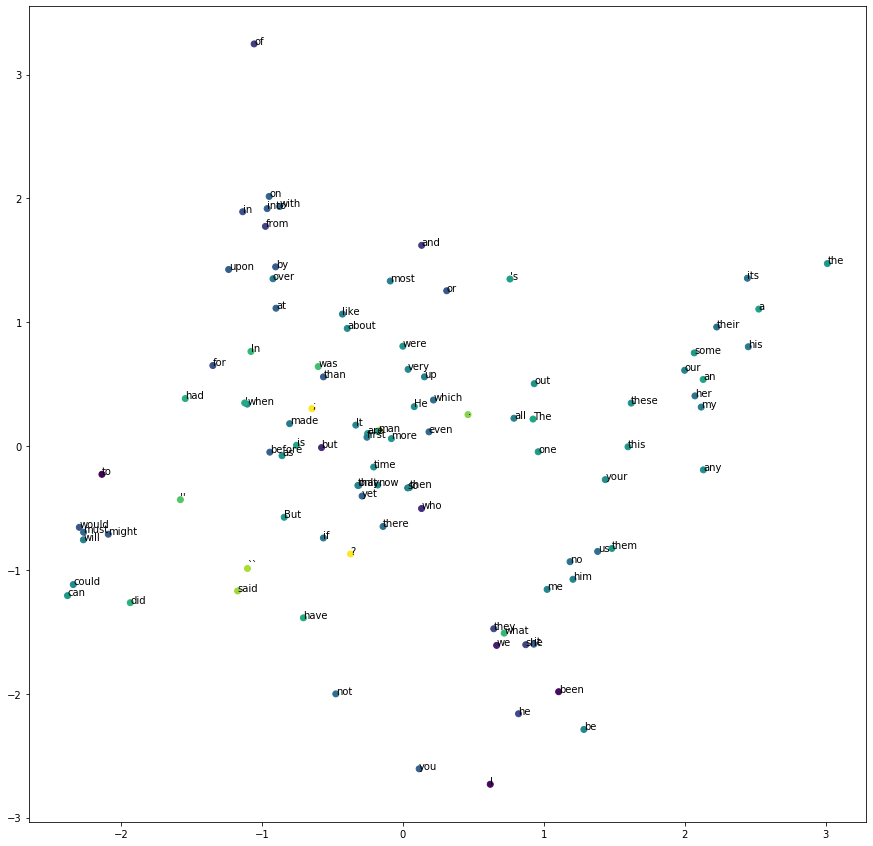

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))

ax.scatter(pc[:, 0], pc[:, 1], c=pc[:, 2])

for i in range(pc.shape[0]):
    ax.annotate(num2word[most_used[i]], (pc[i, 0], pc[i, 1]))
    
plt.show()

In [37]:
def get_closest(v, n=5):
    return np.sum((embedding_weights - v)**2, axis=-1).argsort()[:n]

def arithmetic(words, weights, n=5):
    v = np.zeros(embedding_dim)
    for i in range(len(words)):
        v += embedding_weights[word2num[words[i]]]*weights[i]
    return [num2word[x] for x in get_closest(v, n)]

In [38]:
# Not enough text
arithmetic(["king", "woman", "man"], [1, 1, -1])

['palace', 'ferocity', 'moulding', 'floors', 'locking']

In [39]:
# Да вземем някъв предварително трениран embedding, за по-забавно на български

import fasttext

ft = fasttext.load_model('cc.bg.300.bin')

In [40]:
bg_num2word = ft.words
bg_word2num = {w:i for i,w in enumerate(bg_num2word)}

In [41]:
bg_embed = np.zeros((len(bg_num2word), 300))

In [42]:
for i, w in enumerate(bg_num2word):
    bg_embed[i] = ft[w]

In [43]:
del ft

In [44]:
def get_closest_bg(v, n=5):
    return np.sum((bg_embed - v)**2, axis=-1).argsort()[:n]

def arithmetic_bg(words, weights, n=5):
    v = np.zeros(300)
    for i in range(len(words)):
        v += bg_embed[bg_word2num[words[i]]]*weights[i]
    return [bg_num2word[x] for x in get_closest_bg(v, n)]

In [45]:
arithmetic_bg(["цар"], [1])

['цар', 'царя', 'крал', 'царят', 'царете']

In [46]:
arithmetic_bg(["цар", "мъж", "жена"], [1, -1, 1])

['цар', 'царица', 'царя', 'царете', 'царят']

In [47]:
arithmetic_bg(["Лондон", "Великобритания", "Франция"], [1, -1, 1])

['Лондон', 'Париж', 'Франция', 'Англия', 'Лондон-']

In [48]:
arithmetic_bg(["боза", "лош", "добър"], [1, -1, 1])

['боза', 'боза.', 'бозата', 'сливова', 'ракийка']

In [49]:
arithmetic_bg(["воин", "земя"], [0.5, 0.5])

['земя.', 'воине', 'воин.', 'земя-', 'воинът']

# Да видим и един 1D CNN

In [50]:
len(num_data)

19579

In [51]:
max([len(x) for x in num_data])

876

In [52]:
num_x = np.ones((len(num_data), max([len(x) for x in num_data])))*vocab_size
for i in range(len(num_data)):
    num_x[i, :len(num_data[i])] = num_data[i]
    
num_x

array([[24218., 20295., 13975., ..., 27752., 27752., 27752.],
       [ 3056., 18067.,  2516., ..., 27752., 27752., 27752.],
       [23024., 27285.,  7817., ..., 27752., 27752., 27752.],
       ...,
       [ 5590.,  4100., 14093., ..., 27752., 27752., 27752.],
       [15001., 22375.,  7533., ..., 27752., 27752., 27752.],
       [ 3199., 14481., 10664., ..., 27752., 27752., 27752.]])

In [53]:
to_num = {'EAP':0, 'MWS':1, 'HPL':2}
num_y = np.eye(3)[np.array([to_num[x] for x in train.author])]
num_y.shape

(19579, 3)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_shape=(None,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.Conv1D(64, 3, dilation_rate=2, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          1776192   
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          10272     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          6208      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 1,792,867
Trainable params: 1,792,867
Non-trainable params: 0
____________________________________________

In [55]:
model.compile(tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics = ['categorical_crossentropy', 'accuracy'])

model.fit(num_x, num_y, batch_size=64, epochs=10, validation_split=0.1)

Train on 17621 samples, validate on 1958 samples
Epoch 1/10
17621/17621 [==============================] - 11s 650us/sample - loss: 0.8403 - categorical_crossentropy: 0.8403 - accuracy: 0.5949 - val_loss: 0.5508 - val_categorical_crossentropy: 0.5508 - val_accuracy: 0.7829
Epoch 2/10
17621/17621 [==============================] - 8s 479us/sample - loss: 0.3332 - categorical_crossentropy: 0.3332 - accuracy: 0.8743 - val_loss: 0.4661 - val_categorical_crossentropy: 0.4661 - val_accuracy: 0.8192
Epoch 3/10
17621/17621 [==============================] - 8s 479us/sample - loss: 0.1446 - categorical_crossentropy: 0.1446 - accuracy: 0.9505 - val_loss: 0.5319 - val_categorical_crossentropy: 0.5319 - val_accuracy: 0.8202
Epoch 4/10
17621/17621 [==============================] - 9s 497us/sample - loss: 0.0717 - categorical_crossentropy: 0.0717 - accuracy: 0.9759 - val_loss: 0.6401 - val_categorical_crossentropy: 0.6401 - val_accuracy: 0.8177
Epoch 5/10
17621/17621 [==============================

In [57]:
embed_init = np.vstack([embedding_weights, np.zeros(embedding_dim)])

model_pre = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        vocab_size+1, 
        embedding_dim, 
        input_shape=(None,),
        embeddings_initializer = tf.constant_initializer(embed_init),
        trainable = False
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.Conv1D(64, 3, dilation_rate=2, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_pre.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          1776192   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          10272     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          6208      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [58]:
model_pre.compile(tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics = ['categorical_crossentropy', 'accuracy'])

model_pre.fit(num_x, num_y, batch_size=64, epochs=10, validation_split=0.1)

Train on 17621 samples, validate on 1958 samples
Epoch 1/10
17621/17621 [==============================] - 5s 271us/sample - loss: 0.9858 - categorical_crossentropy: 0.9858 - accuracy: 0.5079 - val_loss: 0.9191 - val_categorical_crossentropy: 0.9191 - val_accuracy: 0.5598
Epoch 2/10
17621/17621 [==============================] - 4s 242us/sample - loss: 0.8726 - categorical_crossentropy: 0.8726 - accuracy: 0.6005 - val_loss: 0.8303 - val_categorical_crossentropy: 0.8303 - val_accuracy: 0.6267
Epoch 3/10
17621/17621 [==============================] - 4s 240us/sample - loss: 0.8212 - categorical_crossentropy: 0.8212 - accuracy: 0.6296 - val_loss: 0.8482 - val_categorical_crossentropy: 0.8482 - val_accuracy: 0.6175
Epoch 4/10
17621/17621 [==============================] - 4s 240us/sample - loss: 0.7905 - categorical_crossentropy: 0.7905 - accuracy: 0.6479 - val_loss: 0.7801 - val_categorical_crossentropy: 0.7801 - val_accuracy: 0.6599
Epoch 5/10
17621/17621 [==============================]